In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\RajeshS\PycharmProjects\python project\projects\Comcast_telecom_complaints_data.csv",index_col=0)

In [3]:
df.head()

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [5]:
df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [6]:
df[df.isnull()].count()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
df.describe(include='all')

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


Task1-Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone'],
      dtype='object')

In [10]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [11]:
df['Date_month_year']

Ticket #
250635   2015-04-22
223441   2015-08-04
242732   2015-04-18
277946   2015-07-05
307175   2015-05-26
            ...    
213550   2015-02-04
318775   2015-02-06
331188   2015-09-06
360489   2015-06-23
363614   2015-06-24
Name: Date_month_year, Length: 2224, dtype: datetime64[ns]

In [12]:
df['Created_Month']=df['Date_month_year'].apply(lambda x:x.month)
df['Created_week']=df['Date_month_year'].apply(lambda x:x.dayofweek)
df['Created_day']=df['Date_month_year'].apply(lambda x:x.day)

In [13]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df['Created_week']=df['Created_week'].map(dmap)
df.head(5)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_week,Created_day
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed,22
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue,4
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat,18
277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun,5
307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tue,26


Text(0.8, 0.8, 'max complaints in jun')

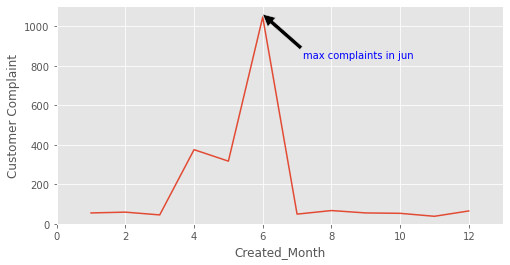

In [14]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(8,4))
bymonth=df.groupby('Created_Month').count().reset_index()
lp=sns.lineplot(x='Created_Month',y='Customer Complaint',data=bymonth,sort=False,markers="0")
ax=lp.axes
ax.set_xlim(0,13)
ax.set_ylim(0,1100)
ax.annotate('max complaints in jun', color='blue',xy=(6,1060),xycoords='data',
            xytext=(0.8,0.8),textcoords='axes fraction',
            arrowprops=dict(facecolor='black'),horizontalalignment='right',
            verticalalignment='top')

(0.0, 32.0)

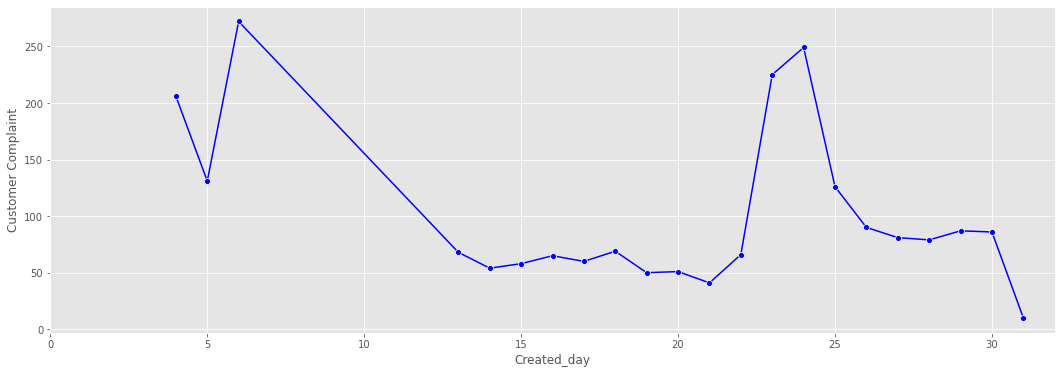

In [15]:
plt.figure(figsize=(18,6))
byday=df.groupby('Created_day').count().reset_index()
lp=sns.lineplot(x='Created_day',y='Customer Complaint',data=byday,sort=False,color='blue',marker='o')
ax=lp.axes
ax.set_xlim(0,32)

<AxesSubplot:xlabel='Created_week', ylabel='count'>

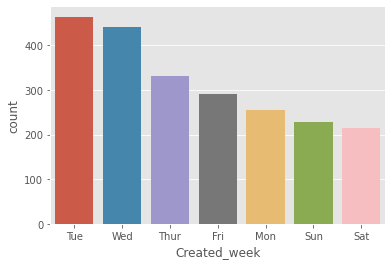

In [16]:
sns.countplot(x='Created_week',data=df,order=df['Created_week'].value_counts().index)  

More Complaints were raised on Tuesday and wednesday ,Least on saturday & sunday

Task-2-Provide a table with the frequency of complaint types.

In [17]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Created_Month', 'Created_week', 'Created_day'],
      dtype='object')

In [18]:
df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [19]:
df['Customer Complaint']=df['Customer Complaint'].str.title()
freq_complaints=df['Customer Complaint'].value_counts()
freq_complaints

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [20]:
import nltk
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [21]:
from wordcloud import WordCloud,STOPWORDS
complaints=df['Customer Complaint'].dropna().tolist()


In [22]:
complaints=''.join(complaints).lower()
complaints

'comcast cable internet speedspayment disappear - service got disconnectedspeed and servicecomcast imposed a new usage cap of 300gb that punishes streaming.comcast not working and no service to bootisp charging for arbitrary data limits with overage feesthrottling service and unreasonable data capscomcast refuses to help troubleshoot and correct my service.comcast extended outagescomcast raising prices and not being available to ask whybilling after service was asked to be disconnectedyahoo failure to restore email search featurecomcast violating open internet rules by blocking hbo go access on sony consolesinternet speedinternet disconnects every nightinternet complaintinternet availability and speedcomcast owes me $65 and claims i need to return equipment i never hadhorrible internet servicefailure to provide services that i am billed for.internet out all the time but they have a monopolyhorrible cable service and customer servicespeedcomcast monopoly bundling practicescomcast!bait a

In [23]:
list_stops=('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')
for word in list_stops:
    STOPWORDS.add(word)

In [24]:
wordcloud=WordCloud(stopwords=STOPWORDS, background_color='white',
                   width=1200,height=1000).generate(complaints)

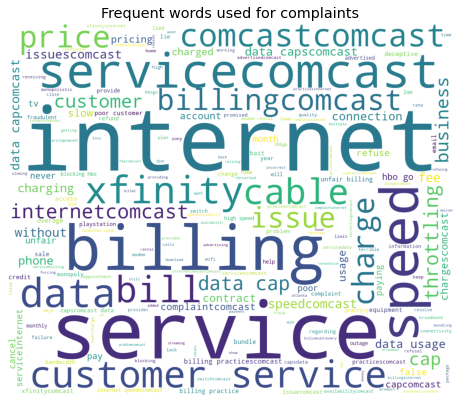

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.title('Frequent words used for complaints')
plt.axis('off')
plt.show()

In [26]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

In [27]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RajeshS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [29]:
df['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment Disappear - Service Got Disconnected',
       'Speed And Service', ...,
       'Comcast Monthly Billing For Returned Modem',
       'Extremely Unsatisfied Comcast Customer',
       'Comcast, Ypsilanti Mi Internet Speed'], dtype=object)

In [30]:

doc_complete=df['Customer Complaint'].tolist()
doc_clean=[clean(doc).split() for doc in doc_complete]

In [31]:
import gensim
from gensim import corpora

In [32]:
dictionary=corpora.Dictionary(doc_clean)
dictionary

In [33]:
doc_term_matrix=[dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [34]:
from gensim.models import LdaModel


In [35]:
num_topic=9
ldamodel=LdaModel(doc_term_matrix,num_topics=num_topic,id2word=dictionary,passes=10)

In [36]:
topics=ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.115*"comcast" + 0.053*"charge" + 0.047*"service" + 0.037*"pricing" + 0.019*"show" + 0.017*"unfair" + 0.016*"day" + 0.016*"refund" + 0.015*"contract" + 0.014*"without"')

(1, '0.072*"internet" + 0.042*"service" + 0.034*"outage" + 0.033*"connectivity" + 0.027*"pay" + 0.025*"intermittent" + 0.021*"back" + 0.019*"sale" + 0.017*"lack" + 0.016*"false"')

(2, '0.078*"comcast" + 0.039*"comcastxfinity" + 0.038*"service" + 0.037*"false" + 0.031*"switch" + 0.028*"cramming" + 0.023*"phone" + 0.020*"bait" + 0.019*"time" + 0.018*"call"')

(3, '0.050*"speed" + 0.038*"access" + 0.037*"charged" + 0.029*"modem" + 0.028*"promised" + 0.025*"email" + 0.023*"throttling" + 0.019*"service" + 0.018*"scam" + 0.017*"week"')

(4, '0.205*"billing" + 0.117*"comcast" + 0.080*"practice" + 0.052*"unfair" + 0.045*"complaint" + 0.017*"service" + 0.016*"2" + 0.016*"said" + 0.011*"ps4" + 0.011*"home"')

(5, '0.290*"comcast" + 0.070*"service" + 0.063*"issue" + 0.049*"billing" + 0.038*"complaint" + 0.023*"charge" + 0

In [37]:
word_dict={}
for i in range(num_topic):
    words=ldamodel.show_topic(i,topn=20)
    word_dict['Topic'+ "{}".format(i)]=[i[0] for i in words]

In [38]:
pd.DataFrame(word_dict)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
0,comcast,internet,comcast,speed,billing,comcast,internet,comcast,bill
1,charge,service,comcastxfinity,access,comcast,service,comcast,fee,cable
2,service,outage,service,charged,practice,issue,service,service,deceptive
3,pricing,connectivity,false,modem,unfair,billing,data,paying,monopolistic
4,show,pay,switch,promised,complaint,complaint,cap,without,price
5,unfair,intermittent,cramming,email,service,charge,speed,monopoly,equipment
6,day,back,phone,throttling,2,xfinity,slow,high,service
7,refund,sale,bait,service,said,fraudulent,customer,installation,increased
8,contract,lack,time,scam,ps4,overage,usage,monthly,option
9,without,false,call,week,home,customer,poor,speed,advertising


In [39]:
!pip install pyLDAvis


Defaulting to user installation because normal site-packages is not writeable


In [40]:
import pyLDAvis.gensim_models

In [41]:
from matplotlib import style
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [42]:
pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
style.use('Solarize_Light2')
Lda_Display=pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_Display)

C:\Users\RajeshS\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


TASK 3 - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [44]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Created_Month', 'Created_week', 'Created_day'],
      dtype='object')

In [45]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [46]:
df['Highlevel_Status']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
df['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [47]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Created_Month', 'Created_week', 'Created_day', 'Highlevel_Status'],
      dtype='object')

In [48]:
df.head(2)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_week,Created_day,Highlevel_Status
Ticket #,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed,22,Closed
223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Tue,4,Closed


TASK 4 - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [49]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Created_Month', 'Created_week', 'Created_day', 'Highlevel_Status'],
      dtype='object')

In [50]:
df["State"].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [51]:
df["State"]=df["State"].str.title()
status_complaints=df.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)
status_complaints

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:ylabel='State'>

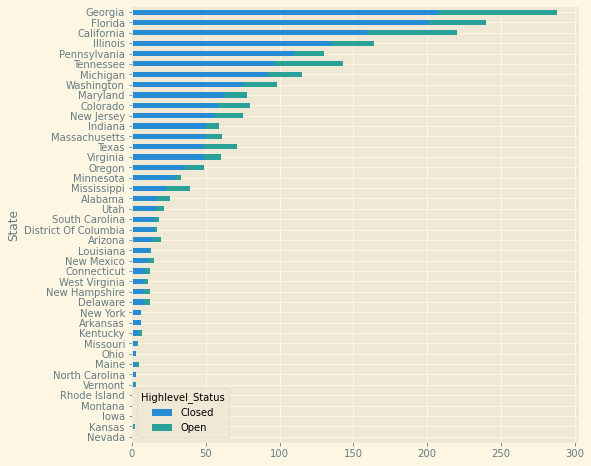

In [52]:
status_complaints.sort_values('Closed',axis=0,ascending=True).plot(kind='barh',figsize=(8,8),stacked=True)

TASK 5 - Which state has the maximum complaints Which state has the highest percentage of unresolved complaints

In [53]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0:"Complaint Count"},axis=1)[:5]

#Georgia has highest complaints

,Complaint Count
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


Georgia state has more number of complaints(288)

In [54]:
Complaint_count=df.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
Complaint_count.sort_values('Closed',axis=0,ascending=False)[:5]
Complaint_count['Resolved']=Complaint_count['Closed']/Complaint_count['Closed'].sum()*100
Complaint_count['Unresolved']=Complaint_count['Open']/Complaint_count['Open'].sum()*100

In [55]:
Complaint_count['Resolved']

State
Alabama                  0.995899
Arizona                  0.820152
Arkansas                 0.351494
California               9.314587
Colorado                 3.397774
Connecticut              0.527241
Delaware                 0.468658
District Of Columbia     0.878735
Florida                 11.775044
Georgia                 12.185120
Illinois                 7.908612
Indiana                  2.929115
Iowa                     0.058582
Kansas                   0.058582
Kentucky                 0.234329
Louisiana                0.702988
Maine                    0.175747
Maryland                 3.690685
Massachusetts            2.929115
Michigan                 5.389572
Minnesota                1.698887
Mississippi              1.347393
Missouri                 0.175747
Montana                  0.058582
Nevada                   0.058582
New Hampshire            0.468658
New Jersey               3.280609
New Mexico               0.644405
New York                 0.351494
North Ca

In [56]:
Complaint_count['Unresolved'].describe()

count    42.000000
mean      2.380952
std       3.357402
min       0.000000
25%       0.193424
50%       0.773694
75%       3.529981
max      15.473888
Name: Unresolved, dtype: float64

In [57]:
Complaint_count.sort_values('Unresolved',axis=0,ascending=False)[:5]

Highlevel_Status,Closed,Open,Resolved,Unresolved
State,,,,
Georgia,208.0,80.0,12.185120,15.473888
California,159.0,61.0,9.314587,11.798839
Tennessee,96.0,47.0,5.623902,9.090909
Florida,201.0,39.0,11.775044,7.543520
Illinois,135.0,29.0,7.908612,5.609284


Georgia state has max unresolved complaints(15%)

Final task --- Provide the percentage of complaints resolved till date, 

which were received through the Internet and customer care call

In [58]:
df.columns

Index(['Customer Complaint', 'Date', 'Date_month_year', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'Created_Month', 'Created_week', 'Created_day', 'Highlevel_Status'],
      dtype='object')

In [59]:
Resolved_complaints=df.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
Resolved_complaints

Highlevel_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [60]:
Resolved_complaints['resolved']=Resolved_complaints['Closed']/Resolved_complaints['Closed'].sum()*100
Resolved_complaints['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

In [61]:
#50.61% of complaints were resolved which were receieved via Customer call where as resolved % stands @49.38 for Internet